# 1838. Frequency of the Most Frequent Element

### Difficulty: <font color = orange> Medium </font>


---
The **frequency** of an element is the number of times it occurs in an array.

You are given an integer array `nums` and an integer `k`. In one operation, you can choose an index of `nums` and increment the element at that index by `1`.

Return *the **maximum possible frequency** of an element after performing **at most** `k` operations*.
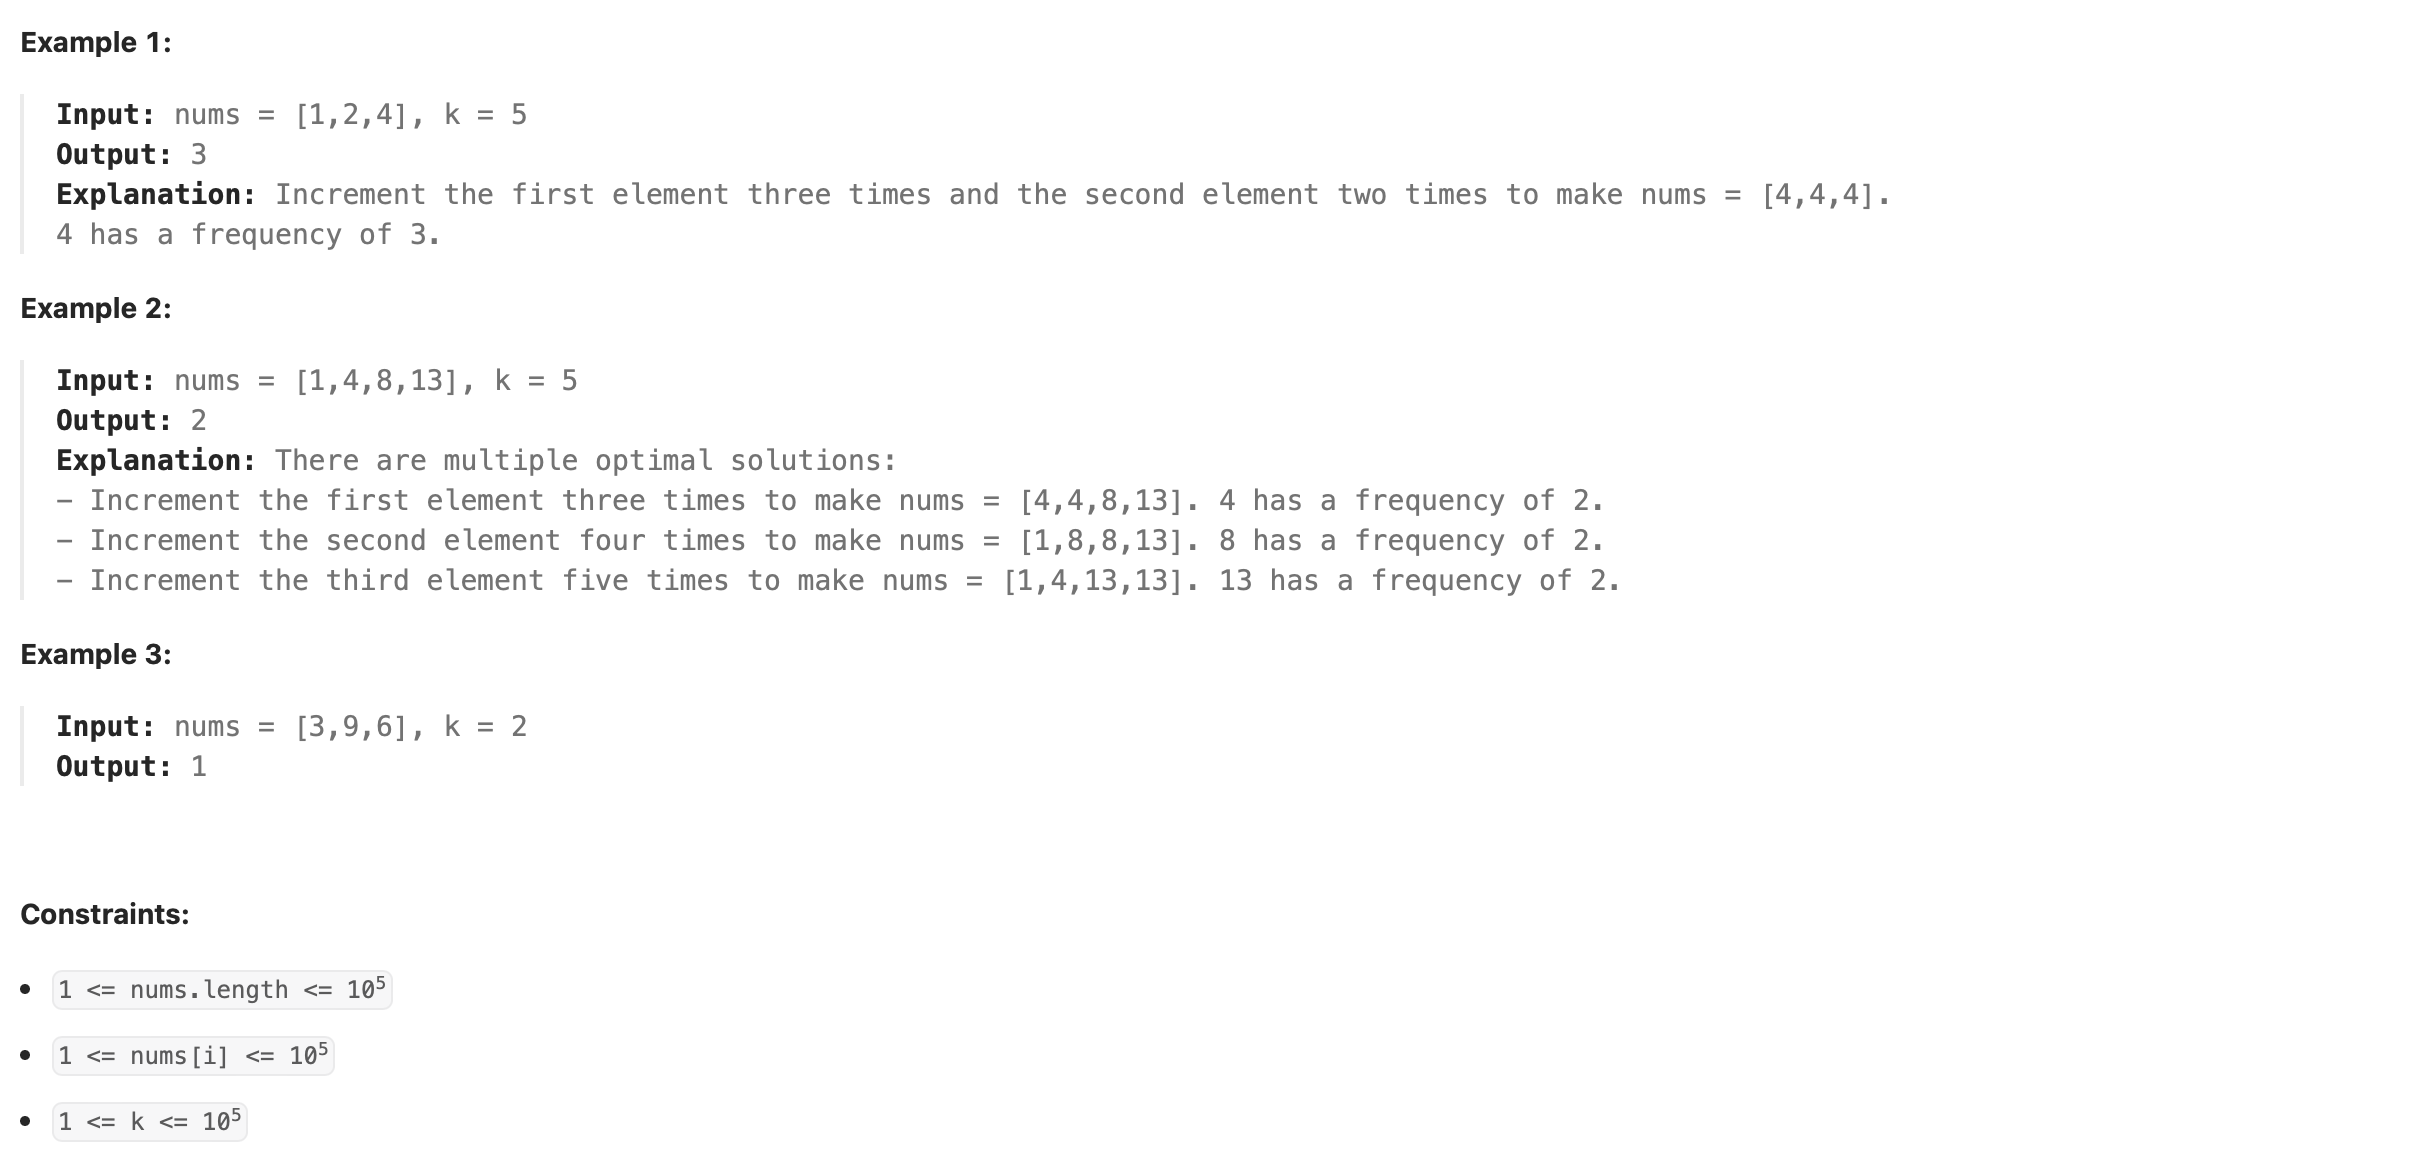

## Approach Overview:

Iterate through every element position in `nums`. At each iteration, check if we can afford the total cost associated with incrementing every element in current window such that they all become equal. 

If we can afford the cost then keep expanding the window until we find the maximum possible one. 

Else shrink it until we can once again afford the window's total element incrementation cost (i.e until window becomes valid / we can afford the cost of making every element in window the same integer).

## Detailed Explanation:

Classic sliding window problem, so we're given an integer array called `nums` and we need to find the maximum number of equal elements we can form by incrementing them. 

We had to sort `nums` to implement the sliding window algo. If we didn't sort the array the sliding window would spit out incorrect answers. Why? Because if don't group elements together by increasing order we miss out on the biggest frequency possible. 

Anyway the gist of the algo is this, we iterate through every element in (sorted) `nums` and ask ourselves if we can afford the cost of making every element in our window equal to the last element in the window (`nums[right]`).

Can we afford the cost of incrementation? 

If yes, then we simply expand our window (and then calculate the frequency). 

If no, then we shrink the window until it becomes valid again (we shrink window by removing leftmost element from it and the total sum of integer elements).

How do we determine the cost and budget ?

Cost: basically it's how much will it require to make every single integer element the same as the rightmost  element (the biggest one) in the current window. 

`Cost = rightmost element x number of elements in the window`

`Budget = the sum of the integer elements in the current window + k`

## Key Challenges:

Figuring out the condition to shrink the window (coming up with a mathematical expression that will check if window is invalid / valid was the key challenge).

## Solution:

In [ ]:
class Solution:
    def maxFrequency(self, nums: List[int], k: int) -> int:
        
        # sort `nums`
        nums = sorted(nums)
        
        # initialize `maxFrequency` (it'll store the maximum possible element frequency)
        maxFrequency = 0 

        # initialize `total_nums` (it'll store the sum of integers in current window)
        total_nums = 0 
        
        # Initialize the left pointer for the sliding window
        left = 0

        # iterate through element position in `nums` using the right pointer
        for right in range(0, len(nums)):

            # calculate the total sum of integers in current window 
            total_nums += nums[right]
            
            # Check if the current window is invalid
            # The window is invalid if the total cost of making all elements equal to `nums[right]`
            # exceeds the allowed operations (`k`). 
            # This is checked by comparing `nums[right] * (right - left + 1)`
            # with `total_nums + k`.            
            while total_nums + k < nums[right] * (right - left + 1):
                
                # remove leftmost element (integer number) from current window
                total_nums -= nums[left]
                
                # increment left so we can shift the window
                left += 1

            # Calculate the maximum possible frequency of the current window
            # Update `maxFrequency` if the size of the current valid window is larger
            maxFrequency = max(maxFrequency, right - left + 1)
       
        # Return the maximum possible frequency found
        return maxFrequency        